# Chapter 1

In [1]:
# data prep
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# download and load data frame
from urllib.request import urlretrieve
file = 'pennsylvania2012_turnout.csv'
url = 'https://assets.datacamp.com/production/course_1650/datasets/' + file
urlretrieve(url, file)

election = pd.read_csv(file, index_col='county')
print(election)

               state   total      Obama     Romney  winner   voters  \
county                                                                
Adams             PA   41973  35.482334  63.112001  Romney    61156   
Allegheny         PA  614671  56.640219  42.185820   Obama   924351   
Armstrong         PA   28322  30.696985  67.901278  Romney    42147   
Beaver            PA   80015  46.032619  52.637630  Romney   115157   
Bedford           PA   21444  22.057452  76.986570  Romney    32189   
Berks             PA  163253  48.939376  49.528646  Romney   250356   
Blair             PA   47631  32.575424  66.133401  Romney    85328   
Bradford          PA   22501  36.847251  61.450602  Romney    40490   
Bucks             PA  319407  49.966970  48.801686   Obama   435606   
Butler            PA   88924  31.920516  66.816607  Romney   122762   
Cambria           PA   57718  40.162514  57.978447  Romney    86988   
Cameron           PA    1967  34.417895  64.260295  Romney     3651   
Carbon

In [2]:
# Assign the row position of election.loc['Bedford']: x
x = 4

# Assign the column position of election['winner']: y
y = 4

# Print the boolean equivalence
print(election.iloc[x, y] == election.loc['Bedford', 'winner'])


True


In [3]:
# Import pandas
import pandas as pd

# Read in filename and set the index: election
election = pd.read_csv(file, index_col='county')

# Create a separate dataframe with the columns ['winner', 'total', 'voters']: results
results = election[['winner', 'total', 'voters']]

# Print the output of results.head()
print(results.head())

           winner   total  voters
county                           
Adams      Romney   41973   61156
Allegheny   Obama  614671  924351
Armstrong  Romney   28322   42147
Beaver     Romney   80015  115157
Bedford    Romney   21444   32189


In [4]:
# Slice the row labels 'Perry' to 'Potter': p_counties
p_counties = election.loc['Perry':'Potter',:]

# Print the p_counties DataFrame
print(p_counties)

# Slice the row labels 'Potter' to 'Perry' in reverse order: p_counties_rev
p_counties_rev = election.loc['Potter':'Perry':-1,:]

# Print the p_counties_rev DataFrame
print(p_counties_rev)

             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Perry           PA   18240  29.769737  68.591009  Romney    27245  66.948064   
Philadelphia    PA  653598  85.224251  14.051451   Obama  1099197  59.461407   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   

                 margin  
county                   
Perry         38.821272  
Philadelphia  71.172800  
Pike          10.978242  
Potter        45.898681  
             state   total      Obama     Romney  winner   voters    turnout  \
county                                                                         
Potter          PA    7205  26.259542  72.158223  Romney    10913  66.022175   
Pike            PA   23164  43.904334  54.882576  Romney    41840  55.363289   
Philadelphia    PA  653598  85.224251  14.0

In [5]:
# the exercise didn't like the spaces in the slice desc! Once I removed them, it passed.

# Slice the columns from the starting column to 'Obama': left_columns
left_columns = election.loc[:,:'Obama']

# Print the output of left_columns.head()
print(left_columns.head())

# Slice the columns from 'Obama' to 'winner': middle_columns
middle_columns = left_columns = election.loc[:,'Obama':'winner']

# Print the output of middle_columns.head()
print(middle_columns.head())

# Slice the columns from 'Romney' to the end: 'right_columns'
right_columns = middle_columns = left_columns = election.loc[:,'Romney':]

# Print the output of right_columns.head()
print(right_columns.head())

          state   total      Obama
county                            
Adams        PA   41973  35.482334
Allegheny    PA  614671  56.640219
Armstrong    PA   28322  30.696985
Beaver       PA   80015  46.032619
Bedford      PA   21444  22.057452
               Obama     Romney  winner
county                                 
Adams      35.482334  63.112001  Romney
Allegheny  56.640219  42.185820   Obama
Armstrong  30.696985  67.901278  Romney
Beaver     46.032619  52.637630  Romney
Bedford    22.057452  76.986570  Romney
              Romney  winner  voters    turnout     margin
county                                                    
Adams      63.112001  Romney   61156  68.632677  27.629667
Allegheny  42.185820   Obama  924351  66.497575  14.454399
Armstrong  67.901278  Romney   42147  67.198140  37.204293
Beaver     52.637630  Romney  115157  69.483401   6.605012
Bedford    76.986570  Romney   32189  66.619031  54.929118


## Filtering DataFrames
I need more practice here - I've found my current approach too clunky, compared to R->dplyr.

* *.all()*: Do not show frames if they have all zeros, or NaN across all columns. This will show rows with some Nan or 0 values.
* *.any()*: Do not show rows that have ANY zero or NaN columns. If a row has a single 0 or Nan - it will not be shown: This might be a bit extreme.
* *.isnull()*: Show columns that have NaN (NaT too? test...)
* *.notnull()*: Show columns that are not NaN
* *.dropna(how='any')*: Drop rows that have have even just one 0 or NaN.
* *.dropna(how='all')*: Drop rows that are entirely NaN or 0.

In [8]:
# Create the boolean array: high_turnout
high_turnout = election.turnout > 70

# Filter the election DataFrame with the high_turnout array: high_turnout_df
high_turnout_df = election[high_turnout]

# Print the high_turnout_results DataFrame
print(high_turnout_df)

             state   total      Obama     Romney  winner  voters    turnout  \
county                                                                        
Bucks           PA  319407  49.966970  48.801686   Obama  435606  73.324748   
Butler          PA   88924  31.920516  66.816607  Romney  122762  72.436096   
Chester         PA  248295  49.228539  49.650617  Romney  337822  73.498766   
Forest          PA    2308  38.734835  59.835355  Romney    3232  71.410891   
Franklin        PA   62802  30.110506  68.583803  Romney   87406  71.850903   
Montgomery      PA  401787  56.637223  42.286834   Obama  551105  72.905708   
Westmoreland    PA  168709  37.567646  61.306154  Romney  238006  70.884347   

                 margin  
county                   
Bucks          1.165284  
Butler        34.896091  
Chester        0.422079  
Forest        21.100520  
Franklin      38.473297  
Montgomery    14.350390  
Westmoreland  23.738508  


In [10]:
old_election = election

# Import numpy
import numpy as np

# Create the boolean array: too_close
too_close = election.margin < 1

# Assign np.nan to the 'winner' column where the results were too close to call
election.loc[too_close, 'winner'] = np.nan

# Print the output of election.info()
print(election.info())

election = old_election

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB
None


In [13]:
# data prep - titanic
file = 'titanic.csv'
url = 'https://assets.datacamp.com/production/course_1650/datasets/' + file
urlretrieve(url, file)

titanic = pd.read_csv(file)
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
None


In [16]:
# Select the 'age' and 'cabin' columns: df
df = titanic.loc[:, ['age','cabin']]

# Print the shape of df
print(df.shape)

# Drop rows in df with how='any' and print the shape
print(df.dropna(how='any').shape)

# Drop rows in df with how='all' and print the shape
print(df.dropna(how='all').shape)

# Call .dropna() with thresh=1000 and axis='columns' and print the output of .info() from titanic
print(titanic.dropna(thresh=1000, axis='columns').info())

(1309, 2)
(272, 2)
(1069, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB
None


In [17]:
# data prep
file = 'pittsburgh2013.csv'
url = 'https://assets.datacamp.com/production/course_1650/datasets/' + file
urlretrieve(url, file)

weather = pd.read_csv(file)
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
Date                         365 non-null object
Max TemperatureF             365 non-null int64
Mean TemperatureF            365 non-null int64
Min TemperatureF             365 non-null int64
Max Dew PointF               365 non-null int64
Mean Dew PointF              365 non-null int64
Min DewpointF                365 non-null int64
Max Humidity                 365 non-null int64
Mean Humidity                365 non-null int64
Min Humidity                 365 non-null int64
Max Sea Level PressureIn     365 non-null float64
Mean Sea Level PressureIn    365 non-null float64
Min Sea Level PressureIn     365 non-null float64
Max VisibilityMiles          365 non-null int64
Mean VisibilityMiles         365 non-null int64
Min VisibilityMiles          365 non-null int64
Max Wind SpeedMPH            365 non-null int64
Mean Wind SpeedMPH           365 non-null int64
Max Gust SpeedMPH       

In [18]:
# Write a function to convert degrees Fahrenheit to degrees Celsius: to_celsius
def to_celsius(F):
    return 5/9*(F - 32)

# Apply the function over 'Mean TemperatureF' and 'Mean Dew PointF': df_celsius
df_celsius = weather.loc[:, ['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)

# Reassign the columns df_celsius
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

# Print the output of df_celsius.head()
print(df_celsius.head())


   Mean TemperatureC  Mean Dew PointC
0          -2.222222        -2.777778
1          -6.111111       -11.111111
2          -4.444444        -9.444444
3          -2.222222        -7.222222
4          -1.111111        -6.666667


In [19]:
# Create the dictionary: red_vs_blue
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

# Use the dictionary to map the 'winner' column to the new column: election['color']
election['color'] = election.winner.map(red_vs_blue)

# Print the output of election.head()
print(election.head())


          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  
county                      
Adams      27.629667   red  
Allegheny  14.454399  blue  
Armstrong  37.204293   red  
Beaver      6.605012   red  
Bedford    54.929118   red  


In [21]:
# Import zscore from scipy.stats
from scipy.stats import zscore

# Call zscore with election['turnout'] as input: turnout_zscore
turnout_zscore = zscore(election['turnout'])

# Print the type of turnout_zscore
print(type(turnout_zscore))

# Assign turnout_zscore to a new column: election['turnout_zscore']
election['turnout_zscore'] = turnout_zscore

# Print the output of election.head()
print(election.head())


<class 'numpy.ndarray'>
          state   total      Obama     Romney  winner  voters    turnout  \
county                                                                     
Adams        PA   41973  35.482334  63.112001  Romney   61156  68.632677   
Allegheny    PA  614671  56.640219  42.185820   Obama  924351  66.497575   
Armstrong    PA   28322  30.696985  67.901278  Romney   42147  67.198140   
Beaver       PA   80015  46.032619  52.637630  Romney  115157  69.483401   
Bedford      PA   21444  22.057452  76.986570  Romney   32189  66.619031   

              margin color  turnout_zscore  
county                                      
Adams      27.629667   red        0.853734  
Allegheny  14.454399  blue        0.439846  
Armstrong  37.204293   red        0.575650  
Beaver      6.605012   red        1.018647  
Bedford    54.929118   red        0.463391  


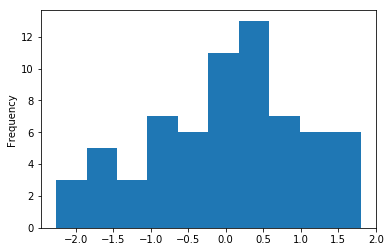

In [23]:
election.turnout_zscore.plot(kind='hist')